In [27]:
# import necessary libraries
import time
import pandas as pd
import numpy as np
import seaborn as sns
# For Regression Model
import statsmodels.formula.api as smf

In [28]:
# read all data from csv file
e_data = pd.read_csv('all_data.csv')
# view all data
e_data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

        UnitPrice  CustomerID         Country  
0            2.55     17850.0  United Kingdom  
1            3.39     17850.0  United Kingdom  
2            2.75     17850.0  United Kingdom  
3            3.39     17850.0  United Kingdom  
4            3.39     17850.0  United Kingdom  
...           ...         ...             ...  
541904       0.85     12680.0          France  
541905       2.10     12680.0          France  
541906       4.15     12680.0          France  
541907       4.15     12680.0          France  
541908       4.95     12680.0          France  

[541909 rows x 7 columns]

In [29]:
# EXPLORE/PRE-PROCESS DATA

# check whether dataframe contains NaN or not
is_NaN = e_data.isnull()

# view which column has NaN
print(is_NaN.any())

# the result shows that Description and CustomerID have NaN

# ASSUMPTION 1: CustomerID missing because some customers may not register as members
# in this case, we can use InvoiceNo to inspect which products are often bought together

# ASSUMPTION 2: Description can give us information about products such as: tags, categories, etc.
# in order to do that, NLP should be applied. But for now, we can ignore this column.

e_data_v1 = e_data.drop(['Description', 'CustomerID'], axis=1)

e_data_v1

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool


InvoiceNo StockCode  Quantity  UnitPrice         Country
0         536365    85123A         6       2.55  United Kingdom
1         536365     71053         6       3.39  United Kingdom
2         536365    84406B         8       2.75  United Kingdom
3         536365    84029G         6       3.39  United Kingdom
4         536365    84029E         6       3.39  United Kingdom
...          ...       ...       ...        ...             ...
541904    581587     22613        12       0.85          France
541905    581587     22899         6       2.10          France
541906    581587     23254         4       4.15          France
541907    581587     23255         4       4.15          France
541908    581587     22138         3       4.95          France

[541909 rows x 5 columns]

In [30]:
# explore stock code (product)
stock_code = e_data_v1['StockCode']

# handle duplicate code -> number of products
stock_code = stock_code.drop_duplicates()
print(stock_code)
print('Number of different products = {}'.format(len(stock_code)))

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
509369    85179a
512588     23617
527065    90214U
537224    47591b
540421     23843
Name: StockCode, Length: 4070, dtype: object
Number of different products = 4070


In [31]:
# explore InvoiceNo
invoices = e_data_v1['InvoiceNo']

# handle duplicate InvoiceNo -> number of invoices
invoices = invoices.drop_duplicates()
print(invoices)
print('Number of different invoices = {}'.format(len(invoices)))

0         536365
7         536366
9         536367
21        536368
25        536369
           ...  
541865    581583
541867    581584
541869    581585
541890    581586
541894    581587
Name: InvoiceNo, Length: 25900, dtype: object
Number of different invoices = 25900


In [32]:
# explore Country
countries = e_data_v1['Country']

# handle duplicate Country -> number of countries
countries = countries.drop_duplicates()
print(countries)
print('Number of different countries = {}'.format(len(countries)))

0               United Kingdom
26                      France
197                  Australia
385                Netherlands
1109                   Germany
1236                    Norway
1404                      EIRE
5320               Switzerland
6421                     Spain
6608                    Poland
7134                  Portugal
7214                     Italy
7279                   Belgium
7986                 Lithuania
9783                     Japan
14938                  Iceland
20000          Channel Islands
20017                  Denmark
29732                   Cyprus
30078                   Sweden
31464                  Austria
31982                   Israel
34083                  Finland
38313                  Bahrain
69007                   Greece
69623                Hong Kong
70758                Singapore
72985                  Lebanon
89570     United Arab Emirates
100810            Saudi Arabia
103598          Czech Republic
119191                  Canada
152712  

In [33]:
# explore quantity
quantity = e_data_v1['Quantity']

min_quantity = quantity.min()
print('Min Quantity: {}'.format(min_quantity))

max_quantity = quantity.max()
print('Max Quantity: {}'.format(max_quantity))

# ASSUMPTION 3: quantity must >= 0
invalid_quantity = quantity[quantity < 0]
print(invalid_quantity)

# set all values < 0 to 0
e_data_v1.at[invalid_quantity.index, 'Quantity'] = 0

e_data_v1

Min Quantity: -80995
Max Quantity: 80995
141       -1
154       -1
235      -12
236      -24
237      -24
          ..
540449   -11
541541    -1
541715    -5
541716    -1
541717    -5
Name: Quantity, Length: 10624, dtype: int64


InvoiceNo StockCode  Quantity  UnitPrice         Country
0         536365    85123A         6       2.55  United Kingdom
1         536365     71053         6       3.39  United Kingdom
2         536365    84406B         8       2.75  United Kingdom
3         536365    84029G         6       3.39  United Kingdom
4         536365    84029E         6       3.39  United Kingdom
...          ...       ...       ...        ...             ...
541904    581587     22613        12       0.85          France
541905    581587     22899         6       2.10          France
541906    581587     23254         4       4.15          France
541907    581587     23255         4       4.15          France
541908    581587     22138         3       4.95          France

[541909 rows x 5 columns]

In [34]:
# explore unit price
price_list = e_data_v1['UnitPrice']

min_price = price_list.min()
print('Min Price: {}'.format(min_price))

max_price = price_list.max()
print('Max Price: {}'.format(max_price))

# ASSUMPTION 4: price must > 0
invalid_price = price_list[price_list <= 0]
print(invalid_price)

# set all values < 0 to 0
e_data_v1.at[invalid_price.index, 'UnitPrice'] = 0

# ASSUMPTION 4.1: UnitPrice = 0 => the price is unknown
# UnitPrice = 0 strongly affect our analysis
# therefore, we need to make prediction or exclude invalid data
e_data_v1.iloc[invalid_price.index]

Min Price: -11062.06
Max Price: 38970.0
622       0.0
1970      0.0
1971      0.0
1972      0.0
1987      0.0
         ... 
536981    0.0
538504    0.0
538505    0.0
538554    0.0
538919    0.0
Name: UnitPrice, Length: 2517, dtype: float64


InvoiceNo StockCode  Quantity  UnitPrice         Country
622       536414     22139        56        0.0  United Kingdom
1970      536545     21134         1        0.0  United Kingdom
1971      536546     22145         1        0.0  United Kingdom
1972      536547     37509         1        0.0  United Kingdom
1987      536549    85226A         1        0.0  United Kingdom
...          ...       ...       ...        ...             ...
536981    581234     72817        27        0.0  United Kingdom
538504    581406    46000M       240        0.0  United Kingdom
538505    581406    46000S       300        0.0  United Kingdom
538554    581408     85175        20        0.0  United Kingdom
538919    581422     23169         0        0.0  United Kingdom

[2517 rows x 5 columns]

In [35]:
# add TotalPrice column to e_data_v1
# TotalPrice = Quantity * UnitPrice

TotalPrice = e_data_v1['Quantity']*e_data_v1['UnitPrice']
e_data_v1['TotalPrice'] = TotalPrice

In [36]:
# Calculate total quantity of each product sold
total_by_product = e_data_v1.groupby(['StockCode'])['Quantity'].agg('sum')
total_by_product = total_by_product.reset_index()

# Get unit price of each product, using mean to avoid conflict price
mean_unit_price = e_data_v1.groupby(['StockCode'])['UnitPrice'].agg('mean')
mean_unit_price = mean_unit_price.reset_index()

# merge total_by_product with mean_unit_price => products information
prods_info = pd.merge(total_by_product, mean_unit_price, on='StockCode', how='inner')
prods_info

StockCode  Quantity  UnitPrice
0            10002      1040   1.056849
1            10080       495   0.376667
2            10120       193   0.210000
3           10123C         5   0.487500
4           10123G         0   0.000000
...            ...       ...        ...
4065  gift_0001_20        20  15.038000
4066  gift_0001_30        37  21.941250
4067  gift_0001_40         3  33.566667
4068  gift_0001_50         4  41.890000
4069             m         1   2.550000

[4070 rows x 3 columns]

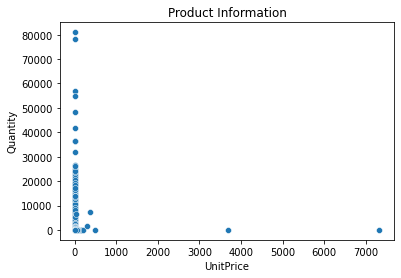

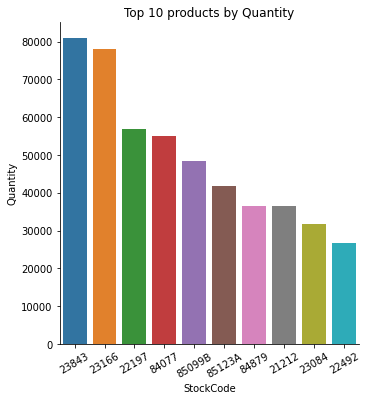

In [44]:
# Visualize our data

# graph all products with quantity and unit price
g1 = sns.scatterplot(x='UnitPrice', y='Quantity', data=prods_info)
g1.set(title='Product Information')

# graph products with top 10 sold quantity
g2 = sns.catplot(x='StockCode', y='Quantity', kind='bar', data=prods_info.sort_values("Quantity", ascending=False).head(10))
g2.set_xticklabels(rotation=30)
g2.set(title='Top 10 products by Quantity')


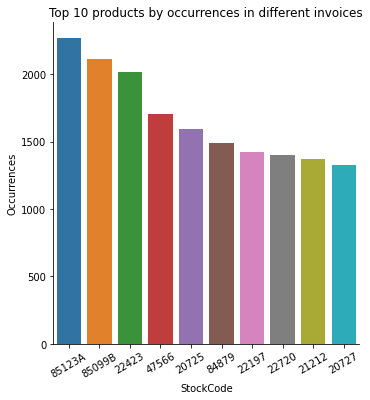

In [66]:
# generate a data frame that expresses the occurrences of each product in different invoices
occurrences = pd.DataFrame({'Occurrences':e_data_v1.loc[(e_data_v1['Quantity']>0)].groupby(['StockCode'])['InvoiceNo'].agg('count')}).reset_index()

# graph top 10 products with most occurrences in different invoices
g3 = sns.catplot(x='StockCode', y= 'Occurrences', kind='bar', data=occurrences.sort_values('Occurrences', ascending=False).head(10))
g3.set_xticklabels(rotation=30)
g3.set(title = 'Top 10 products by occurrences in different invoices')

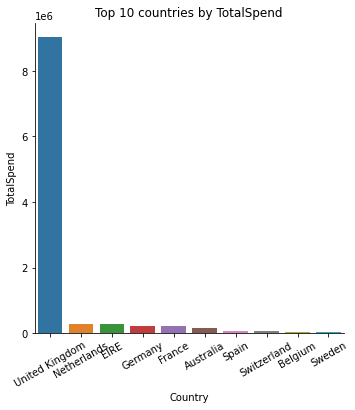

In [67]:
# calculate total spend of each country
TotalSpend_by_Country = pd.DataFrame({'TotalSpend':e_data_v1.groupby(['Country'])['TotalPrice'].agg('sum')}).reset_index()

# sort TotalSpend values
TotalSpend_by_Country = TotalSpend_by_Country.sort_values('TotalSpend', ascending=False)
g4 = sns.catplot(x="Country", y="TotalSpend", kind='bar', data=TotalSpend_by_Country.head(10))
g4.set_xticklabels(rotation=30)
g4.set(title='Top 10 countries by TotalSpend')

In [68]:
# we dont want to suggest product with quantity = 0
unsold_prods = prods_info.loc[(prods_info['Quantity']==0)]
print(unsold_prods)

# drop unsold products
prods_info_v1 = prods_info.drop(index=unsold_prods.index)

# check products sold with unknown price
unknown_price = prods_info_v1.loc[(prods_info_v1['UnitPrice']==0)]
print(unknown_price)

# get known price products
known_price = prods_info_v1.drop(index=unknown_price.index)

     StockCode  Quantity  UnitPrice
4       10123G         0        0.0
9        10134         0        0.0
46       16053         0        0.0
85      17011A         0        0.0
157      20689         0        0.0
...        ...       ...        ...
4049  DCGS0068         0        0.0
4052  DCGS0071         0        0.0
4053  DCGS0072         0        0.0
4054  DCGS0073         0        0.0
4055  DCGS0074         0        0.0

[129 rows x 3 columns]
     StockCode  Quantity  UnitPrice
254      20849         1        0.0
290      20950         1        0.0
401      21134         1        0.0
1903     23001       200        0.0
2449     23595         5        0.0
2523    35592T         4        0.0
2534    35600A         1        0.0
2593     35951        57        0.0
2786    62095B         2        0.0
2862    72803B         1        0.0
2872     72814         2        0.0
3014    84247C         1        0.0
3144    84611B      1287        0.0
3176     84670        23        0.0
3377

In [69]:
# estimate association between Quantity and UnitPrice
est = smf.ols(formula='UnitPrice ~ Quantity', data=known_price).fit()
est.summary()

# the p_values is greater than 0.05
# fail to reject null hypothesis => no relationship => cannot make prediction
# exclude unknown price products

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              UnitPrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5912
Date:                Wed, 23 Jun 2021   Prob (F-statistic):              0.442
Time:                        17:33:01   Log-Likelihood:                -24693.
No. Observations:                3922   AIC:                         4.939e+04
Df Residuals:                    3920   BIC:                         4.940e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4779      2.258      3.312      0.001       3.052      11.904
Quantity      -0.0004      0.001     -0.769      0.442      -0.002       0.001
==============================================================================
Omnibus:                    12400.322   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1121196597.918
Skew:                          49.808   Prob(JB):                         0.00
Kurtosis:                    2620.450   Cond. No.                     4.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# prepare data for recommendation system based on collaborative filtering
invoices_products = e_data_v1.pivot_table(index='InvoiceNo', columns=['StockCode'], values='TotalPrice')

keep_columns = list(known_price.StockCode)
# only keep products with full information
invoices_products = invoices_products[keep_columns]

# ASSUMPTION 5: We do not want to suggest products included in less than 10 invoices.
# remove products included in less than 10 invoices. and fill remaining with NaN with 0.

invoices_products = invoices_products.dropna(thresh=10, axis=1).fillna(0)

# now, the cells have good insight to build our similarity model
# each cell expresses how much money the user willing to pay for the product
invoices_products

StockCode  10002  10080  10120  10125  10133  10135  11001  15030  15034  \
InvoiceNo                                                                  
536365       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
536366       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
536367       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
536368       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
536369       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
C581484      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
C581490      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
C581499      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
C581568      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
C581569      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

StockCode  15036  ...  AMAZONFEE  BANK CHARGES   C2  DCGSSBOY  DCGSSGIRL  DOT  \
InvoiceNo         ...                                                           
536365       0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   
536366       0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   
536367       0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   
536368       0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   
536369       0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   
...          ...  ...        ...           ...  ...       ...        ...  ...   
C581484      0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   
C581490      0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   
C581499      0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   
C581568      0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   
C581569      0.0  ...        0.0           0.0  0.0       0.0        0.0  0.0   

StockCode    M  POST    S  gift_0001_20  
InvoiceNo                                
536365     0.0   0.0  0.0           0.0  
536366     0.0   0.0  0.0           0.0  
536367     0.0   0.0  0.0           0.0  
536368     0.0   0.0  0.0           0.0  
536369     0.0   0.0  0.0           0.0  
...        ...   ...  ...           ...  
C581484    0.0   0.0  0.0           0.0  
C581490    0.0   0.0  0.0           0.0  
C581499    0.0   0.0  0.0           0.0  
C581568    0.0   0.0  0.0           0.0  
C581569    0.0   0.0  0.0           0.0  

[25900 rows x 3230 columns]

In [18]:
start_time = time.time()

# Build Similarity Matrix using Pearson method
product_similarity_df = invoices_products.corr(method='pearson')
end_time = time.time()

print('Time to execute model: {}s'.format(end_time-start_time))

# save our similarity matrix to csv file
product_similarity_df.to_csv('product_similarity.csv')

Time to execute model: 379.10593605041504


In [14]:
# read product_similarity from file
product_similarity = pd.read_csv(
    'product_similarity.csv',
    dtype={'StockCode': str},
    index_col=0
)

product_similarity

10002     10080     10120     10125     10133     10135  \
StockCode                                                                  
10002         1.000000 -0.000601  0.001413 -0.000140  0.098709  0.018310   
10080        -0.000601  1.000000 -0.000506 -0.000681  0.024559 -0.001015   
10120         0.001413 -0.000506  1.000000 -0.000573  0.012150  0.004066   
10125        -0.000140 -0.000681 -0.000573  1.000000  0.014693  0.014857   
10133         0.098709  0.024559  0.012150  0.014693  1.000000  0.082192   
...                ...       ...       ...       ...       ...       ...   
DOT           0.011859  0.000744 -0.002312  0.007812  0.046852  0.089549   
M            -0.000945 -0.000837 -0.000796 -0.001060 -0.002013 -0.001612   
POST          0.005961 -0.001294 -0.001231  0.004491 -0.002626  0.007147   
S            -0.000229 -0.000202 -0.000193 -0.000259 -0.000484 -0.000386   
gift_0001_20 -0.000468 -0.000414 -0.000394  0.001656  0.000389  0.005294   

                 11001     15030     15034     15036  ...  AMAZONFEE  \
StockCode                                             ...              
10002        -0.000016 -0.000340 -0.000118 -0.000498  ...  -0.000165   
10080         0.002690 -0.000301  0.012600 -0.000437  ...  -0.000146   
10120         0.003943 -0.000286  0.004391 -0.000308  ...  -0.000138   
10125         0.003347 -0.000385 -0.000807 -0.001247  ...  -0.000187   
10133         0.022923 -0.000719  0.003659  0.002335  ...  -0.000348   
...                ...       ...       ...       ...  ...        ...   
DOT           0.033484 -0.001375  0.014608  0.016672  ...  -0.000666   
M            -0.000936 -0.000465 -0.001151 -0.001856  ...  -0.000231   
POST          0.001611 -0.000732 -0.001570 -0.001369  ...  -0.000354   
S            -0.000237 -0.000114 -0.000280 -0.000447  ...  -0.000055   
gift_0001_20  0.002976 -0.000234  0.006729  0.006550  ...  -0.000113   

              BANK CHARGES        C2  DCGSSBOY  DCGSSGIRL       DOT         M  \
StockCode                                                                       
10002            -0.000531 -0.001895 -0.000325  -0.000369  0.011859 -0.000945   
10080            -0.000470 -0.001676 -0.000288  -0.000326  0.000744 -0.000837   
10120            -0.000447 -0.001594 -0.000274  -0.000310 -0.002312 -0.000796   
10125            -0.000602 -0.002148 -0.000369  -0.000418  0.007812 -0.001060   
10133            -0.001125  0.000008  0.020474  -0.000061  0.046852 -0.002013   
...                    ...       ...       ...        ...       ...       ...   
DOT              -0.002149 -0.007661  0.036914   0.036078  1.000000 -0.003851   
M                -0.000747 -0.002663 -0.000457  -0.000519 -0.003851  1.000000   
POST             -0.001144 -0.004079 -0.000700  -0.000794 -0.005915 -0.002056   
S                -0.000179 -0.000638 -0.000110  -0.000124 -0.000925 -0.000322   
gift_0001_20     -0.000366 -0.001304 -0.000224  -0.000254  0.078844 -0.000658   

                  POST         S  gift_0001_20  
StockCode                                       
10002         0.005961 -0.000229     -0.000468  
10080        -0.001294 -0.000202     -0.000414  
10120        -0.001231 -0.000193     -0.000394  
10125         0.004491 -0.000259      0.001656  
10133        -0.002626 -0.000484      0.000389  
...                ...       ...           ...  
DOT          -0.005915 -0.000925      0.078844  
M            -0.002056 -0.000322     -0.000658  
POST          1.000000 -0.000493     -0.001007  
S            -0.000493  1.000000     -0.000158  
gift_0001_20 -0.001007 -0.000158      1.000000  

[3230 rows x 3230 columns]

In [15]:
# RECOMMENDATION FUNCTIONS

# get top n similar products when viewing specific product
def get_similar_products(code: str, n=5):
    similar_score = product_similarity[code].sort_values(ascending=False)
    # exclude the product itself
    similar_score = similar_score.drop(index=code, axis=1)
    # get top n
    similar_score = similar_score.head(n)
    return similar_score

# Take an example input StockCode='10002'
example1 = get_similar_products('10002')
print(example1)

StockCode
22402     0.490273
22398     0.475235
85014A    0.315576
84535A    0.288988
23003     0.271883
Name: 10002, dtype: float64


In [16]:
# get top n similar products based on bought products (quantity, stock_code)
def get_similar_products_v2(data, n=5):
    similar_prods = pd.DataFrame()
    exclude_prods = []
    for prod_code, prod_quantity in data:
        exclude_prods.append(prod_code)
        similar_score = product_similarity[prod_code] * prod_quantity
        similar_prods = similar_prods.append(similar_score, ignore_index=True)
    similar_prods = similar_prods.sum().sort_values(ascending=False)
    # exclude products in data
    similar_prods = similar_prods.drop(index=exclude_prods, axis=1)
    # get top n
    similar_prods = similar_prods.head(n)
    return similar_prods

example_data = [('10002',3),('10080',5),('10120',1)]

example2 = get_similar_products_v2(example_data)
print(example2)


22398     1.588440
22402     1.487209
85014A    0.950678
84535A    0.865789
23003     0.813417
dtype: float64
